In [1]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df_title = pd.read_csv('../zippedData/imdb.title.basics.csv.gz')
df_ratings = pd.read_csv('../zippedData/imdb.title.ratings.csv.gz')

In [4]:
df = df_title.merge(df_ratings, on='tconst', how='inner')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
tconst             73052 non-null object
primary_title      73052 non-null object
original_title     73052 non-null object
start_year         73052 non-null int64
runtime_minutes    65720 non-null float64
genres             73052 non-null object
averagerating      73052 non-null float64
numvotes           73052 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 7.5+ MB


In [14]:
# We only loose 8 hundred movies using this method.
df = df[df.genres.notnull()]

In [16]:
df_runtime = df[df.runtime_minutes.notnull()]

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


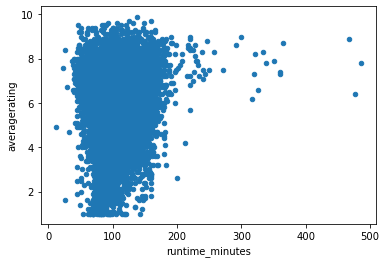

In [22]:
# plot out rating vs run times where number of votes is greater than 100 and runtime less than 600 minutes
df_runtime[(df.numvotes > 100) & (df.runtime_minutes < 600)].plot(x='runtime_minutes', y='averagerating', kind='scatter' )

It seems like there are some serious outliers in the length of the movies. Let's take a look at them. 

In [25]:
df.sort_values('runtime_minutes', ascending = False)[df.numvotes > 100][:30]

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
15171,tt2008009,The Clock,The Clock,2010,1440.0,Drama,8.9,219
67287,tt7528992,Europa: The Last Battle,Europa: The Last Battle,2017,746.0,Documentary,8.2,162
53649,tt5375100,Paint Drying,Paint Drying,2016,607.0,Documentary,9.3,218
49074,tt4842296,A Lullaby to the Sorrowful Mystery,Hele sa hiwagang hapis,2016,485.0,"Adventure,Drama,Fantasy",7.8,150
34673,tt3317562,Leviathan: The Story of Hellraiser and Hellbou...,Leviathan: The Story of Hellraiser and Hellbou...,2015,476.0,Documentary,6.4,247
52801,tt5275892,O.J.: Made in America,O.J.: Made in America,2016,467.0,"Biography,Crime,Documentary",8.9,14946
10434,tt1792588,Metallica/Slayer/Megadeth/Anthrax: The Big 4: ...,Metallica/Slayer/Megadeth/Anthrax: The Big 4: ...,2010,364.0,"Documentary,Music",8.7,770
19329,tt2194569,"Florentina Hubaldo, CTE","Florentina Hubaldo, CTE",2012,360.0,Drama,7.3,147
15548,tt2028550,Century of Birthing,Siglo ng pagluluwal,2011,360.0,Drama,7.4,177
37048,tt3526810,Adolf Hitler: The Greatest Story Never Told,Adolf Hitler: The Greatest Story Never Told,2013,350.0,"Biography,Documentary,History",7.9,4780


In [32]:
df[(df.genres == 'Documentary') & (df.numvotes > 1000)].sort_values('averagerating', ascending = False).head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
62997,tt6679360,On vam ne Dimon,On vam ne Dimon,2017,50.0,Documentary,9.2,2721
29639,tt2869878,The Poodles: In the Flesh,The Poodles: In the Flesh,2010,152.0,Documentary,9.2,1172
56499,tt5773402,Dominion,Dominion,2018,120.0,Documentary,9.2,1096
24518,tt2412748,Saving Mes Aynak,Saving Mes Aynak,2014,60.0,Documentary,9.1,1013
840,tt10312668,Tell No One,Tylko nie mów nikomu,2019,121.0,Documentary,8.9,2111


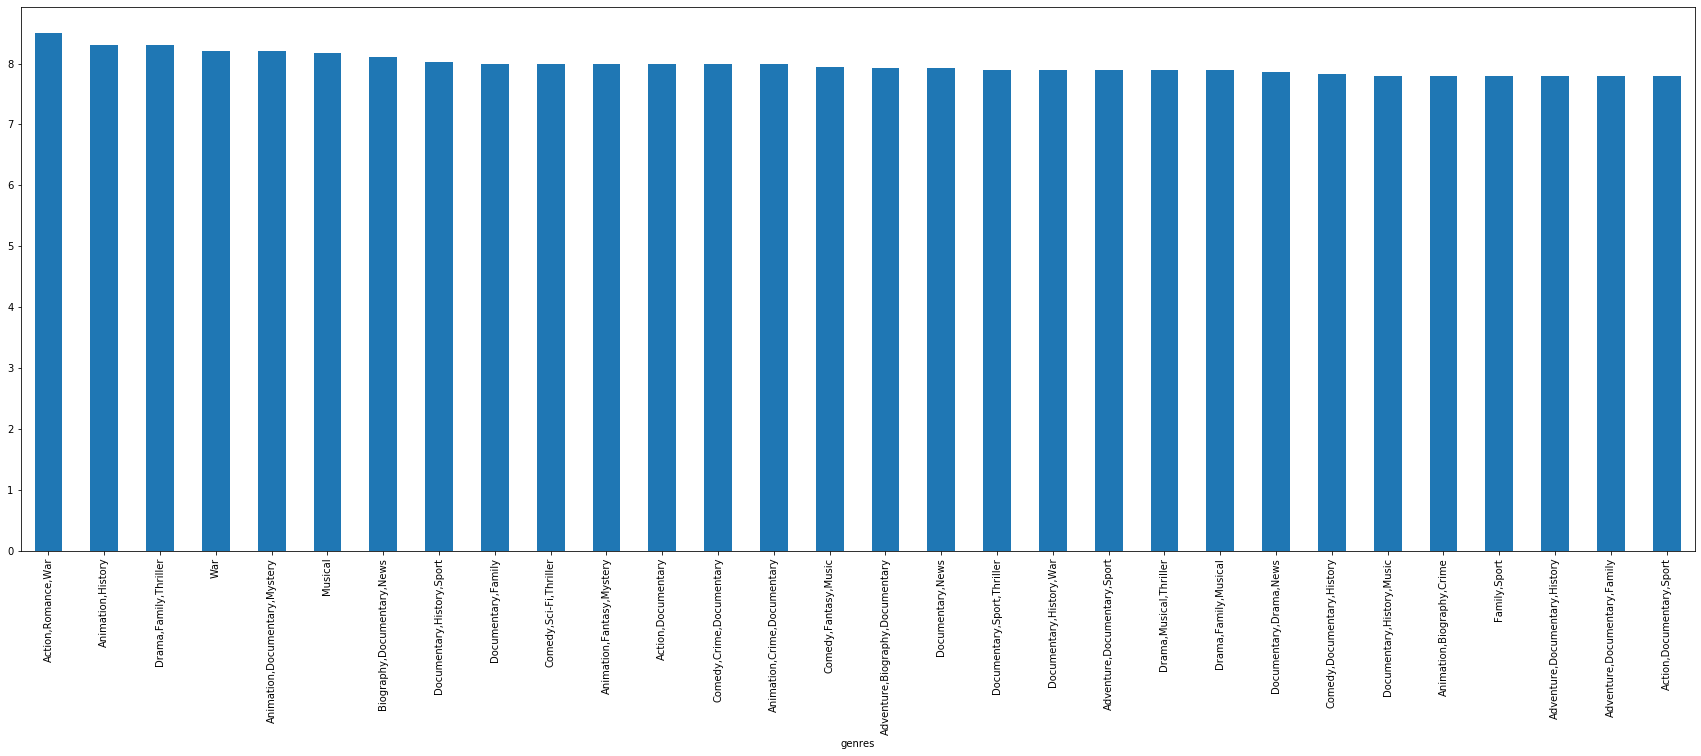

In [43]:
(df[df.numvotes > 1000].groupby(['genres']).averagerating.mean().sort_values(ascending = False))[:30].plot(kind='bar', figsize=(30,10))